In [2]:
import pyomeca
import sys

sys.path.append("..")

# Plot style
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("svg")
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-ticks")
%matplotlib inline
# %load_ext lab_black

In [3]:
data_path = "../Jupyter/c3d/2010-12-16-B0035-S01-T01.c3d"

In [4]:
from pyomeca import Analogs

muscles = [
    "Fx1",
    "Fy1",
    "Fz1",
    "Mx1",
    "My1",
    "Mz1",
    "Fx2",
    "Fy2",
    "Fz2",
    "Mx2",
    "My2",
    "Mz2",
    "L1",
    "L2",
    "L3",
    "L4",
    "L5",
    "L6",
    "L7",
    "L8",
    "R9",
    "R10",
    "R11",
    "R12",
    "R13",
    "R14",
    "R15",
    "R16",
]
emg = Analogs.from_c3d(data_path, suffix_delimiter=".", usecols=muscles)

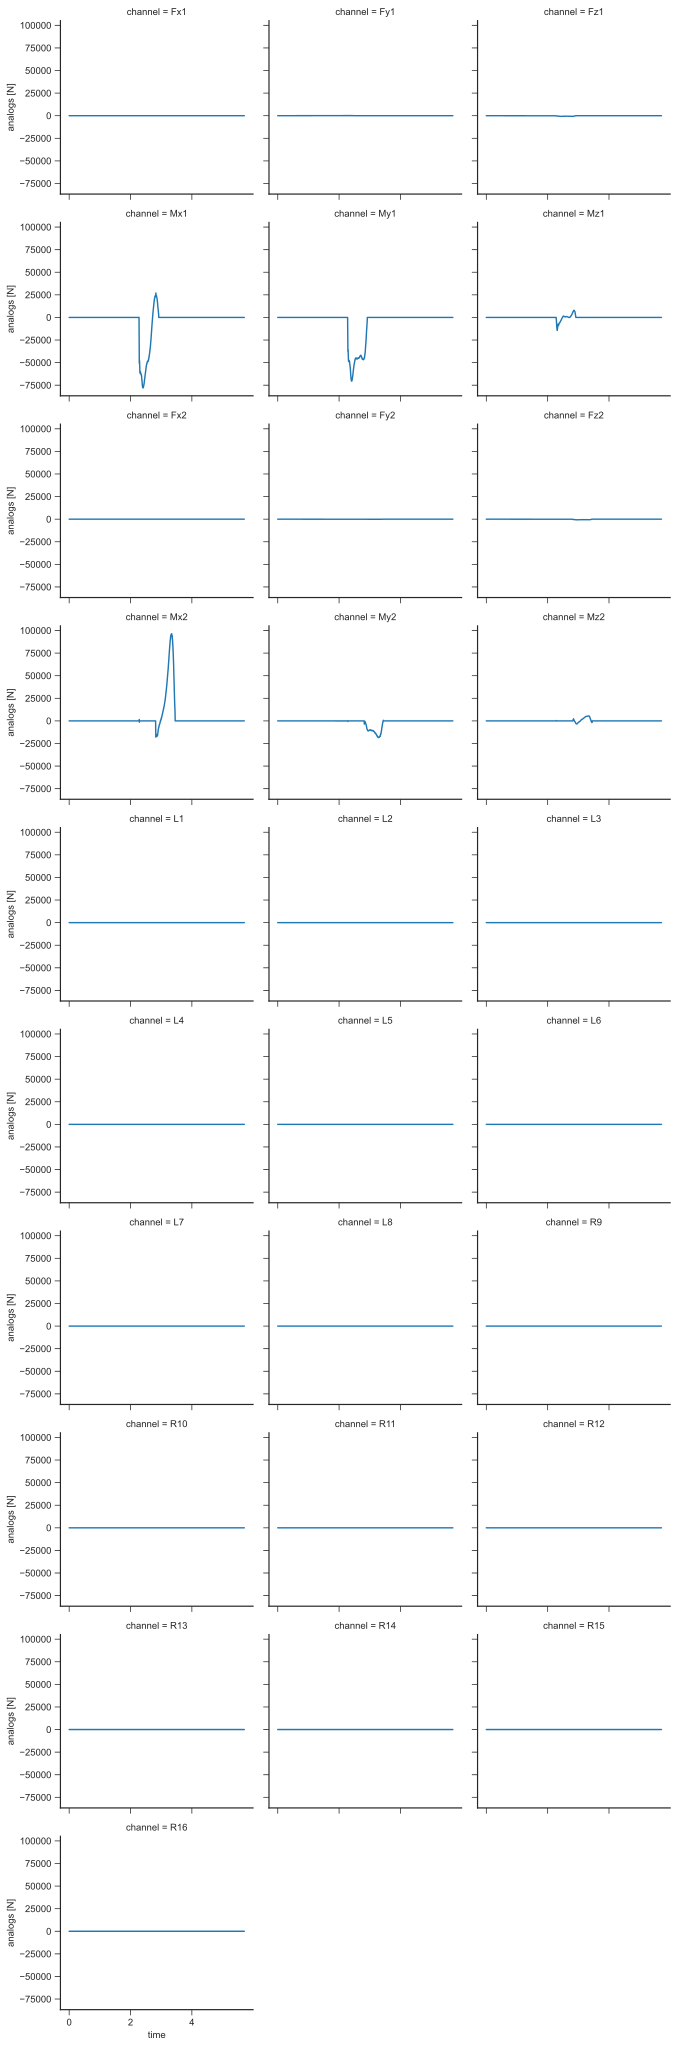

In [5]:
emg.plot(x="time", col="channel", col_wrap=3);

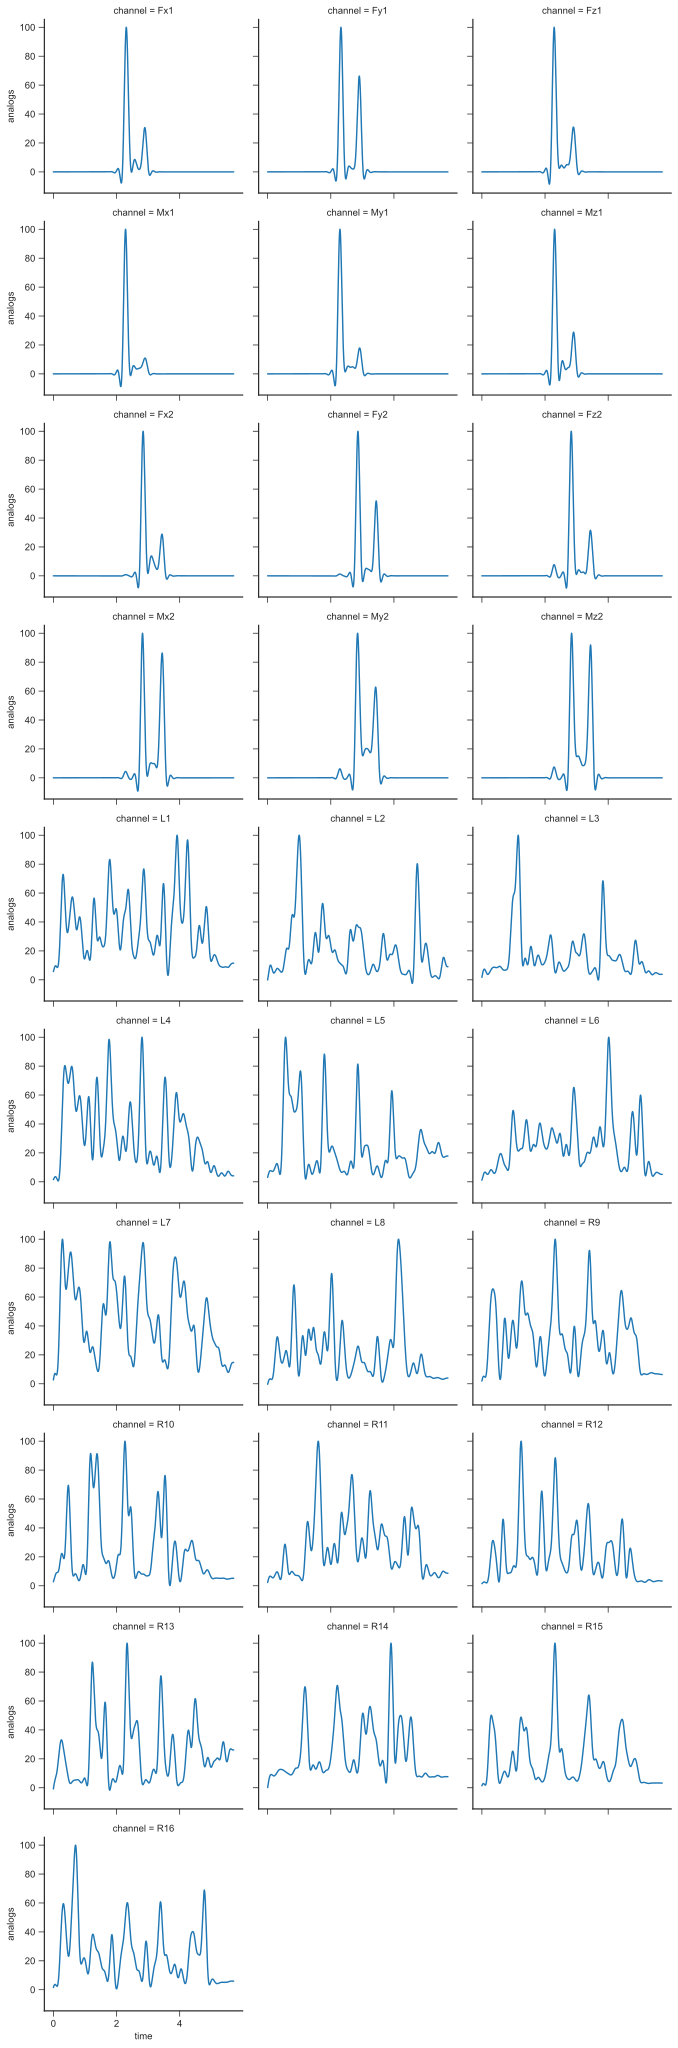

In [7]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize()
)

emg_processed.plot(x="time", col="channel", col_wrap=3);

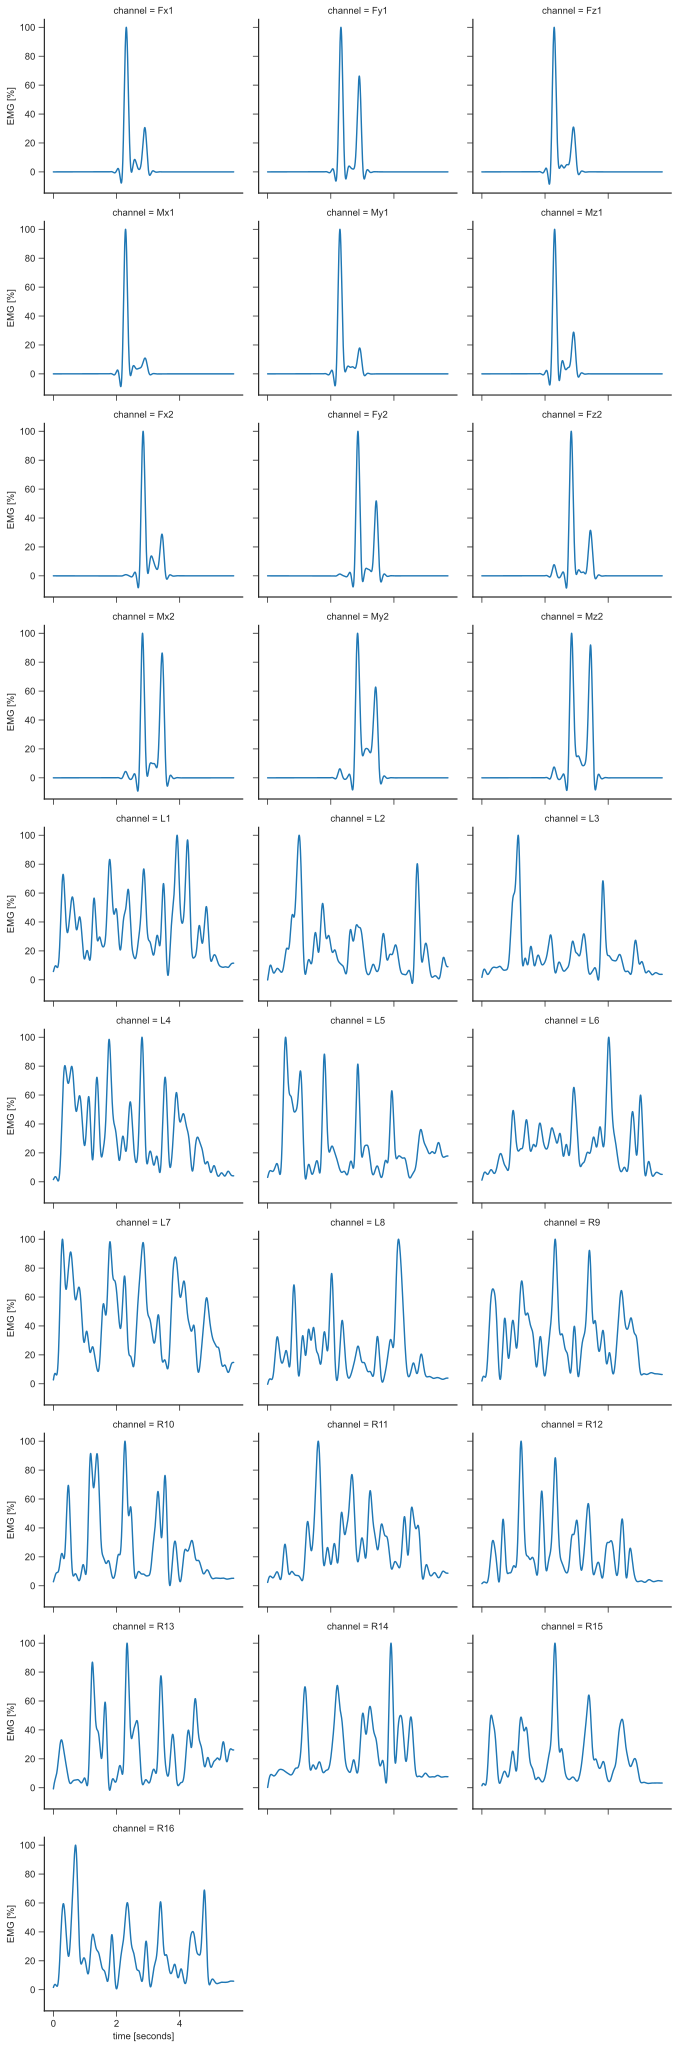

In [8]:
emg_processed.name = "EMG"
emg_processed.attrs["units"] = "%"
emg_processed.time.attrs["units"] = "seconds"

emg_processed.plot(x="time", col="channel", col_wrap=3);

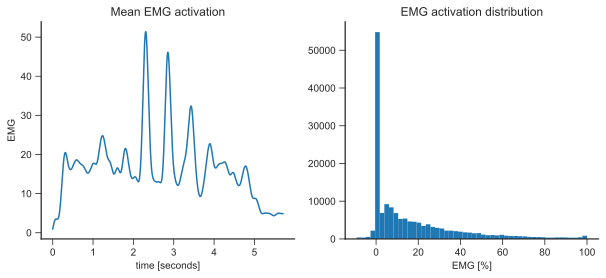

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

emg_processed.mean("channel").plot(ax=axes[0])
axes[0].set_title("Mean EMG activation")

emg_processed.plot.hist(ax=axes[1], bins=50)
axes[1].set_title("EMG activation distribution");

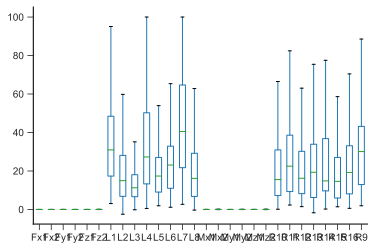

In [10]:
emg_dataframe = emg_processed.meca.to_wide_dataframe()
emg_dataframe.plot.box(showfliers=False);

In [11]:
emg_dataframe.corr().style.background_gradient().set_precision(2)

channel,Fx1,Fx2,Fy1,Fy2,Fz1,Fz2,L1,L2,L3,L4,L5,L6,L7,L8,Mx1,Mx2,My1,My2,Mz1,Mz2,R10,R11,R12,R13,R14,R15,R16,R9
channel,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fx1,1.00,0.19,0.94,0.20,0.97,0.23,0.20,-0.04,-0.06,0.01,-0.06,0.15,0.12,0.07,0.93,0.12,0.96,0.20,0.99,0.17,0.34,0.13,0.47,0.40,0.23,0.55,0.25,0.43
Fx2,0.19,1.00,0.38,0.95,0.20,0.98,0.24,0.09,0.03,0.25,0.26,0.16,0.25,-0.00,0.06,0.87,0.09,0.93,0.17,0.89,-0.07,-0.01,0.12,-0.10,-0.01,-0.04,-0.04,-0.01
Fy1,0.94,0.38,1.00,0.40,0.89,0.38,0.25,0.02,-0.03,0.04,0.03,0.22,0.17,0.08,0.80,0.22,0.85,0.38,0.92,0.32,0.23,0.11,0.46,0.30,0.19,0.43,0.22,0.37
Fy2,0.20,0.95,0.40,1.00,0.21,0.92,0.26,0.07,0.01,0.20,0.23,0.19,0.20,0.02,0.06,0.88,0.10,0.95,0.18,0.94,-0.02,-0.02,0.15,-0.01,-0.01,0.03,0.04,0.10
Fz1,0.97,0.20,0.89,0.21,1.00,0.24,0.19,-0.03,-0.03,0.00,-0.05,0.17,0.17,0.03,0.98,0.13,0.99,0.21,0.98,0.19,0.36,0.10,0.45,0.32,0.26,0.52,0.23,0.40
Fz2,0.23,0.98,0.38,0.92,0.24,1.00,0.26,0.10,0.01,0.29,0.23,0.14,0.26,0.01,0.12,0.89,0.14,0.90,0.21,0.88,-0.03,-0.00,0.14,-0.05,-0.03,0.01,-0.02,0.02
L1,0.20,0.24,0.25,0.26,0.19,0.26,1.00,0.04,0.06,0.62,0.36,0.34,0.68,0.57,0.15,0.23,0.16,0.21,0.19,0.23,0.13,-0.02,0.28,-0.03,0.31,0.15,0.26,0.18
L2,-0.04,0.09,0.02,0.07,-0.03,0.10,0.04,1.00,0.29,0.21,0.50,0.40,0.22,0.06,-0.06,-0.00,-0.05,0.03,-0.03,0.01,-0.29,-0.01,-0.07,-0.36,-0.20,-0.23,0.08,-0.06
L3,-0.06,0.03,-0.03,0.01,-0.03,0.01,0.06,0.29,1.00,0.13,0.23,0.22,0.12,0.09,-0.05,-0.04,-0.05,0.01,-0.05,-0.03,0.26,-0.09,0.14,-0.09,0.47,0.06,-0.10,0.08
